# Reading data CSV files using python

In [1]:
from pandas import read_csv
path = r"C:\Users\Home\jupyter works\CSV\winequality-red.csv"

# when headers are not specified in csv file then we specify headers as follows...
#    headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#    data = read_csv(path, names=headernames)
# default separator is  ,
data = read_csv(path,sep=";")
print(data.shape)
print(data[:3])

(10, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  


# Data  Visualisation.


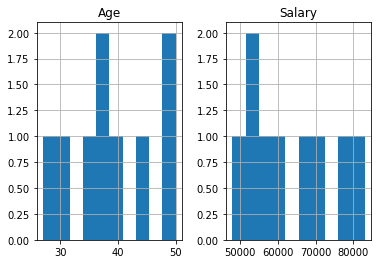

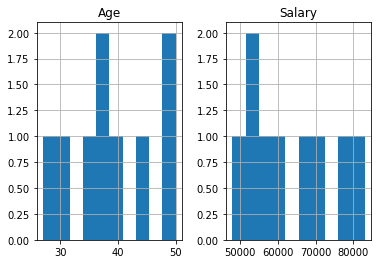

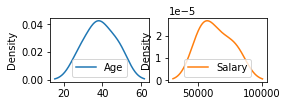

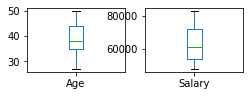

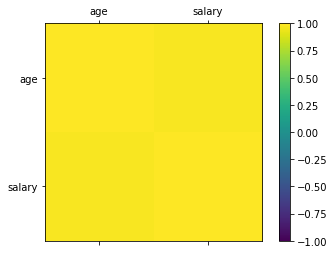

In [4]:
import pandas
from matplotlib import pyplot
data.hist()
pyplot.show()

# another example
path = r"C:\Users\Home\jupyter works\CSV\Data_preprocessing_1.csv"
data = pandas.read_csv(path)
data.hist()
pyplot.show()

# density plots
data.plot(kind="density",subplots = True, layout=(3,3),sharex=False)
pyplot.show()

# Box and whisker plot
data.plot(kind="box", subplots = True, layout =(3,3), sharex = False, sharey = False)
pyplot.show()

## Multivariate Plots : Interaction among multiple variables
# correlation Matrix Plot
import numpy
correlations = data.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = numpy.arange(0,2,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = ["age", "salary"]
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()


# Data Preprocessing - part 1 


In [5]:
import numpy
import matplotlib.pyplot as mpl_plot
import pandas
path = r"C:\Users\Home\jupyter works\CSV\Data_preprocessing_1.csv"
data_set = pandas.read_csv(path)
print(data_set)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [6]:
# extracting independent variables...
# here country,age, salary are independent variables
# iloc method of pandas library help choosing rows and columns.
independents = data_set.iloc[0:,:-1 ]
print(independents)

# extracting dependent variables...
# here Purchased is a dependent variable.
dependents = data_set.iloc[:,3].values
print(dependents)


   Country   Age   Salary
0   France  44.0  72000.0
1    Spain  27.0  48000.0
2  Germany  30.0  54000.0
3    Spain  38.0  61000.0
4  Germany  40.0      NaN
5   France  35.0  58000.0
6    Spain   NaN  52000.0
7   France  48.0  79000.0
8  Germany  50.0  83000.0
9   France  37.0  67000.0
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


### Handling Missing Data

to handle missing data, we can use two ways:
1. delete the particular row
2. calculate the mean of that column.

we can use pandas DataFrame.fillna to fill nan values

In [7]:
independents.mean()
fill_ind = independents.fillna(independents.mean())
fill_ind

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


### Encoding Categorical data 

here country and purchased are categorical data.
but we have to encode them to numericals.
in country, we can encode them as 1,2,3 
this is called label encoding.
but using this, the model will assume there is some correlation between them so, we have to convert them to dummy variables. 
100, 010, 001, etc.
converting to dummy variables is called one hot encoding.

for categorical variable purchased, we will use LabelEncoder only because it will directly encode in 0 or 1.

the sklearn.preprocessing provides all the functions.

In [8]:
from sklearn.preprocessing import *
# label Encoding
fill_ind.iloc[:,0] = LabelEncoder().fit_transform(fill_ind.iloc[:,0])
print(fill_ind)
dependents = LabelEncoder().fit_transform(dependents)
print(dependents)

   Country        Age        Salary
0        0  44.000000  72000.000000
1        2  27.000000  48000.000000
2        1  30.000000  54000.000000
3        2  38.000000  61000.000000
4        1  40.000000  63777.777778
5        0  35.000000  58000.000000
6        2  38.777778  52000.000000
7        0  48.000000  79000.000000
8        1  50.000000  83000.000000
9        0  37.000000  67000.000000
[0 1 0 0 1 1 0 1 0 1]


In [13]:
# One hot encoding

from sklearn.compose import *   # column transformer
from sklearn.preprocessing import *
import numpy as np
ct = ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder='passthrough')
fill_ind = np.array(ct.fit_transform(fill_ind),dtype = np.str)
print(fill_ind)

# dummy variable trap
#  the dummy variables cause collinearity among themselves, making them
#  dependent. to remove that we eliminate one column of dummy variables.
fill_ind = fill_ind[:, 1:]
print("\n",fill_ind)


[['1.0' '0.0' '0.0' '44.0' '72000.0']
 ['1.0' '0.0' '1.0' '27.0' '48000.0']
 ['0.0' '1.0' '0.0' '30.0' '54000.0']
 ['1.0' '0.0' '1.0' '38.0' '61000.0']
 ['0.0' '1.0' '0.0' '40.0' '63777.77777777778']
 ['1.0' '0.0' '0.0' '35.0' '58000.0']
 ['1.0' '0.0' '1.0' '38.77777777777778' '52000.0']
 ['1.0' '0.0' '0.0' '48.0' '79000.0']
 ['0.0' '1.0' '0.0' '50.0' '83000.0']
 ['1.0' '0.0' '0.0' '37.0' '67000.0']]

 [['0.0' '0.0' '44.0' '72000.0']
 ['0.0' '1.0' '27.0' '48000.0']
 ['1.0' '0.0' '30.0' '54000.0']
 ['0.0' '1.0' '38.0' '61000.0']
 ['1.0' '0.0' '40.0' '63777.77777777778']
 ['0.0' '0.0' '35.0' '58000.0']
 ['0.0' '1.0' '38.77777777777778' '52000.0']
 ['0.0' '0.0' '48.0' '79000.0']
 ['1.0' '0.0' '50.0' '83000.0']
 ['0.0' '0.0' '37.0' '67000.0']]


### splitting dataset into training and test data


In [10]:
from sklearn.model_selection import *
ind_train, ind_test, dep_train, dep_test = train_test_split(fill_ind, dependents,test_size = 0.2, random_state = 0)
print(ind_train,ind_test, dep_train, dep_test,sep="\n\n--->")

[['1.0' '0.0' '40.0' '63777.77777777778']
 ['0.0' '0.0' '37.0' '67000.0']
 ['0.0' '1.0' '27.0' '48000.0']
 ['0.0' '1.0' '38.77777777777778' '52000.0']
 ['0.0' '0.0' '48.0' '79000.0']
 ['0.0' '1.0' '38.0' '61000.0']
 ['0.0' '0.0' '44.0' '72000.0']
 ['0.0' '0.0' '35.0' '58000.0']]

--->[['1.0' '0.0' '30.0' '54000.0']
 ['1.0' '0.0' '50.0' '83000.0']]

--->[1 1 1 0 1 0 0 1]

--->[0 0]


### Feature Scaling
in feature scaling, we standardize the independent variables in specific range. as we can see in our data, the age and salary variables have different ranges, so they will cause problem. we can use two methods -
1. Standardisation
    x' = { x - mean(x) } / deviation
2. Normalisation
    x' = {x - min(x)} / { max(x) - min(x)}
    
we are using standardisation.

we can use StandardScaler from sklearn.preprocessing.

In [11]:
from sklearn.preprocessing import *
ind_train = StandardScaler().fit_transform(ind_train)
print(ind_train)

[[ 2.64575131 -0.77459667  0.26306757  0.12381479]
 [-0.37796447 -0.77459667 -0.25350148  0.46175632]
 [-0.37796447  1.29099445 -1.97539832 -1.53093341]
 [-0.37796447  1.29099445  0.05261351 -1.11141978]
 [-0.37796447 -0.77459667  1.64058505  1.7202972 ]
 [-0.37796447  1.29099445 -0.0813118  -0.16751412]
 [-0.37796447 -0.77459667  0.95182631  0.98614835]
 [-0.37796447 -0.77459667 -0.59788085 -0.48214934]]


In [12]:

ind_test = StandardScaler().fit_transform(ind_test)
print(ind_test)

[[ 0.  0. -1. -1.]
 [ 0.  0.  1.  1.]]
